In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pour la régression linéaire
from scipy.stats import linregress

# constante de pesanteur
from scipy.constants import g
print(f"g = {g:.6f} m.s-2")

g = 9.806650 m.s-2


# Etude d'un mouvement

Dans ce TP, nous allons utiliser python pour étudier deux mouvements. 
Premièrement, nous étudierons un mouvement unidimensionnel puis dans un deuxième temps un mouvement bidimensionnel.

## Partie 1 : Mouvement unidimensionnel

Voici les coordonnées $x$ et $z$ de la chute d'un objet considéré ponctuel. 
Les coordonnées sont données en mètre, le temps en seconde.

In [2]:
x = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
z = [5.00, 4.95, 4.80, 4.56, 4.22, 3.77, 3.23, 2.60, 1.86, 1.03, 0.09]
t = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]

<div class="alert alert-success">

<b>Exercice :</b>

<ol>
<li>Représenter la trajectoire</li>
<li>Calculer les valeurs de la vitesse à chaque instant</li>
<li>Représenter la vitesse en fonction du temps</li>
<li>Caractériser le mouvement, calculer l'accélération et en déduire une valeur de l'accélération de la pesenteur à l'aide d'une régression linéaire.</li>
</ol>
</div>


### 1. Représenter la trajectoire

Commençons par un code minimal en utilisant la fonction `plot` de `matplotlib`. 

On rajoute le nom des axes avec les unités et le titre du graphique.

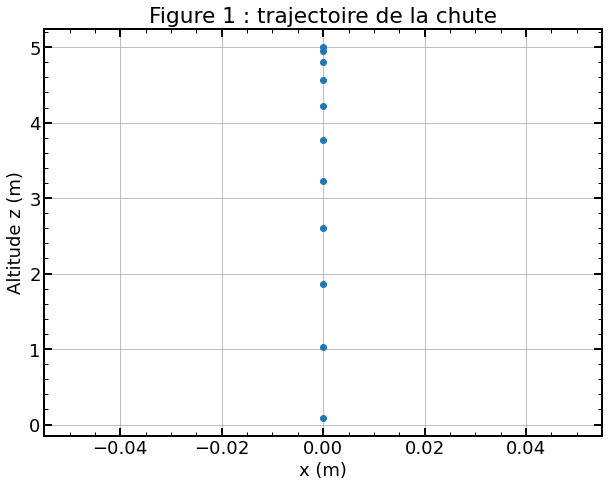

In [3]:
plt.plot(x, z, "o")
plt.title("Figure 1 : trajectoire de la chute")
plt.xlabel("x (m)")
plt.ylabel("Altitude z (m)");
# plt.ylim(0, 5.5)

Voici d'autres versions possibles, avec des options permettant de changer l'aspect du graphique. Pour représenter un nuage de point, on peut utiliser directement la fonction `scatter` au lieu de la fonction `plot`.

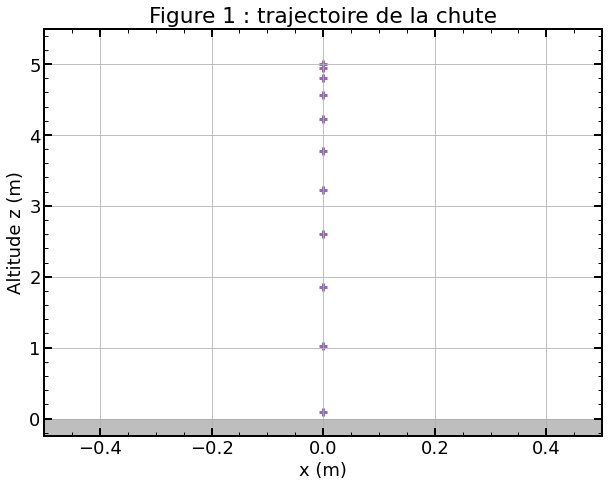

In [4]:
# utiliser plot ou scatter
plt.scatter(x, z, marker="+", s=50, linewidths=3, color="C4")
# plt.plot(x, z, "+", markersize=10, markeredgewidth=2)

# aspect du graphique
plt.title("Figure 1 : trajectoire de la chute")
plt.xlabel('x (m)')
plt.ylabel('Altitude z (m)')

# (option) "dessin" du sol
plt.xlim(-.5, .5)
plt.ylim(-.25, 5.5)
plt.fill_between([-0.5, 0.5], [0, 0], y2=-.25, color="C7", alpha=.5);

### 2. Calcul de la vitesse

Pour calculer les valeurs de la vitesse en chaque point de la trajectoire on effectue une boucle.

On calcule la projection du vecteur vitesse sur l'axe $z$ à partir de la coordonnées
$z$ du point et du temps. Au point $i$, on l'obtient avec la formule suivante (il s'agit d'une dérivée à droite) :
$$
v_i = \frac{z_{i+1} - z_i}{t_{i+1} - t_i}
$$
La valeur de la vitesse est donnée par la norme (ici en 1D la valeur absolue).

In [5]:
v_z = list()
for i in range(len(z) - 1):
    v = (z[i + 1] - z[i]) / (t[i + 1] - t[i])
    print(f"v_z = {v:.2f} m.s-1   v = {abs(v):.2f} m.s-1")
    v_z.append(v)

# la composante suivant x est nulle
v_x = np.zeros(len(v_z))

# calcul de la valeur absolue avec numpy
vitesses = np.abs(v_z)
# vitesses = list()
# for v_z_i in v_z:
#     vitesses.append(abs(v_z_i))

v_z = -0.50 m.s-1   v = 0.50 m.s-1
v_z = -1.50 m.s-1   v = 1.50 m.s-1
v_z = -2.40 m.s-1   v = 2.40 m.s-1
v_z = -3.40 m.s-1   v = 3.40 m.s-1
v_z = -4.50 m.s-1   v = 4.50 m.s-1
v_z = -5.40 m.s-1   v = 5.40 m.s-1
v_z = -6.30 m.s-1   v = 6.30 m.s-1
v_z = -7.40 m.s-1   v = 7.40 m.s-1
v_z = -8.30 m.s-1   v = 8.30 m.s-1
v_z = -9.40 m.s-1   v = 9.40 m.s-1


On peut aussi représenter le vecteur vitesse sur la trajectoire avec la fonction `quiver` de matplotlib.

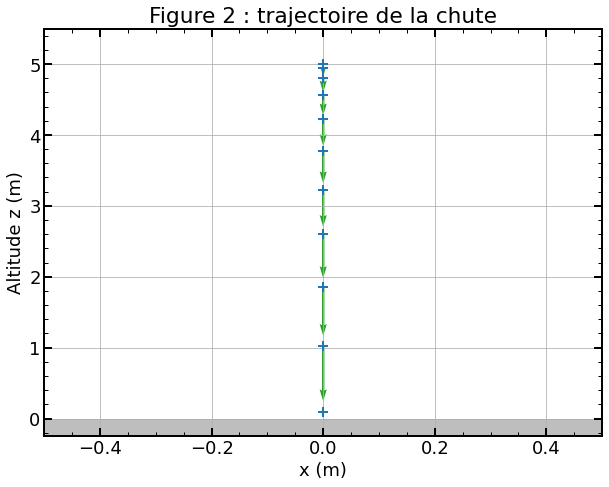

In [6]:
# utiliser plot ou scatter
plt.plot(x, z, "+", markersize=10, markeredgewidth=2)

# aspect du graphique
plt.title("Figure 2 : trajectoire de la chute")
plt.xlabel("x (m)")
plt.ylabel("Altitude z (m)")

# représentation des vitesses
plt.quiver(x[:-1], z[:-1], v_x, v_z, units="xy", angles="xy", 
           color="C2", scale=20, width=0.02)

# dessin du sol
plt.xlim(-.5, .5)
plt.ylim(-.25, 5.5)
plt.fill_between([-0.5, 0.5], [0, 0], y2=-.25, color="C7", alpha=.5)

### 3. Représentation graphique de la vitesse

Traçons la vitesse en fonction du temps.

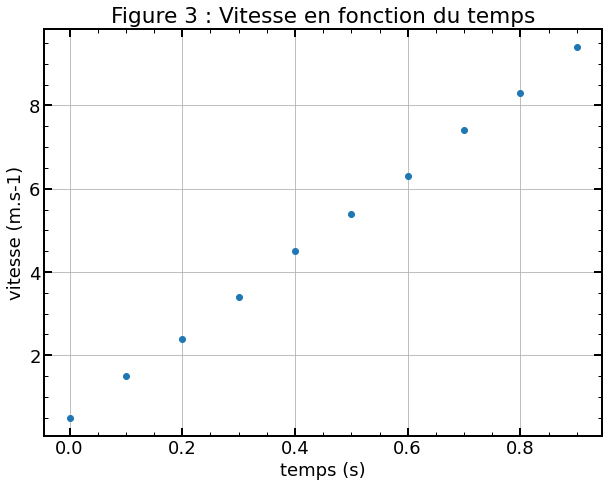

In [7]:
plt.plot(t[:-1], vitesses, "o")

plt.title("Figure 3 : Vitesse en fonction du temps")
plt.xlabel("temps (s)")
plt.ylabel("vitesse (m.s-1)");

### 4. Caractérisation du mouvement

D'après la figure 1, représentant la trajectoire, on peut en déduire que la
trajectoire est rectiligne.

D'après la figure 3, représentant la vitesse en fonction du temps, on observe
que la vitesse n'est pas constante. Le mouvement n'est donc pas uniforme.
Cependant, on remarque que la variation de la vitesse est constante. En effet, la vitesse
semble suivre une loi affine. L'accélération, la pente, serait donc constante.

On va calculer la pente de la droite par une régression linéaire.

In [8]:
a, b, r, pval, stderr = linregress(t[:-1], vitesses)

In [9]:
print(f"a   ={a:6.2f} +/- {stderr:.2f} m.s-2\nb   ={b:8.4f} m.s-1\nr^2 = {r**2:9.6f}")

a   =  9.84 +/- 0.06 m.s-2
b   =  0.4836 m.s-1
r^2 =  0.999663


In [10]:
# calcul des valeurs y = ax + b du modèle
modele = [a * ti + b for ti in t[:-1]]

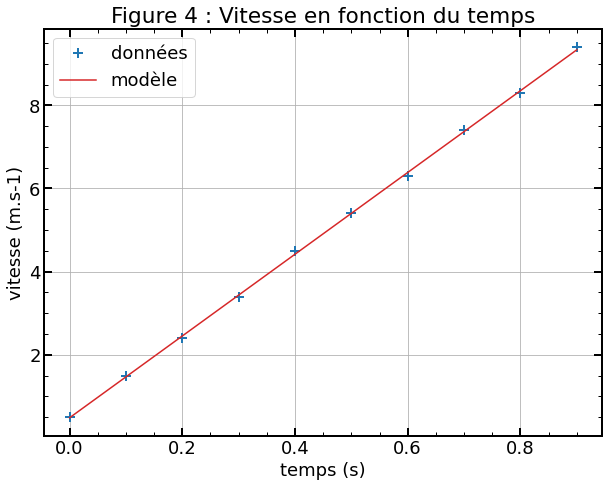

In [11]:
plt.plot(t[:-1], vitesses, "+", label="données", markersize=10, markeredgewidth=2)
plt.plot(t[:-1], modele, "C3-", label="modèle")

plt.title("Figure 4 : Vitesse en fonction du temps")
plt.xlabel("temps (s)")
plt.ylabel("vitesse (m.s-1)")
plt.legend();

Le modèle linéaire semble acceptable et la pente de la droite est très proche 
de la valeur du champs de pesanteur. On peut donc supposer qu'il s'agit 
d'un mouvement de chute libre.

In [12]:
print(f"g = {g:.4f} m.s-2")
print(f"a = {a:.4f} m.s-2")
print(f"Ecart relatif : {(a - g) / g * 100:.2f} %")

g = 9.8066 m.s-2
a = 9.8364 m.s-2
Ecart relatif : 0.30 %


## Partie 2 : Mouvement bidimensionnel

Voici les coordonnées $x$ et $y$ de la trajectoire d'un objet considéré ponctuel. 
Les coordonnées sont données en mètre, le temps en seconde. Il s'agit du lancé d'un
ballon. 

    dt = 0.066
    x = np.array([0.003, 0.141, 0.275, 0.410, 0.554, 0.686, 0.820, 0.958, 
                  1.089, 1.227, 1.359, 1.490, 1.599, 1.705, 1.801])
    y = np.array([0.746, 0.990, 1.175, 1.336, 1.432, 1.505, 1.528, 1.505, 
                  1.454, 1.355, 1.207, 1.018, 0.797, 0.544, 0.266])

Dans l'hypothèse, d'un mouvement pour lequel la masse ponctuelle n'est soumise
qu'à son poids (cas d'une chute libre), on rappelle l'équation de la trajectoire :
$$
y = -\frac{g}{2v_o^2 \cos^2\alpha} x^2 + x \tan\alpha + y_o
$$
avec $v_o$ la vitesse initiale, $y_o$ l'altitude initiale et $\alpha$ 
l'angle avec l'horizontale.

### Exercice 1 :

<div class="alert alert-success">

<ol>
<li>Ecrire une fonction qui calcule la trajectoire dans le cas d'une chute libre dans l'intervalle $x\in[0 ; 2.5]$ (m)</li>
<li>Représenter cette trajectoire sur un graphique</li>
</ol>

On considère une trajectoire avec les conditions initiales suivantes :
<ul>
<li>un angle avec l'horizontale de 60°</li>
<li>une vitesse initiale de 5 m.s<sup>-1</sup></li> 
<li>une altitude initiale de 0.75 m.</li>
</ul>

</div>



On écrit une fonction pour calculer la trajectoire :

In [13]:
def trajectoire(x, alpha=45, vo=1, yo=1, g=9.80665):
    """ Calcul de la trajectoire dans le cas d'une chute libre.

    Args:
        x (float): position en m
        alpha (float): angle avec l'horizontale en degrés
        vo (float): vitesse initiale en m.s-1
        yo (float): altitude initiale
        g (float): pesanteur (m.s-2)

    Returns:
        y en metre.    
    """
    alpha_r = np.radians(alpha)
    return -g / (2 * vo**2 * (np.cos(alpha_r))**2) * x**2 + x * np.tan(alpha_r) + yo

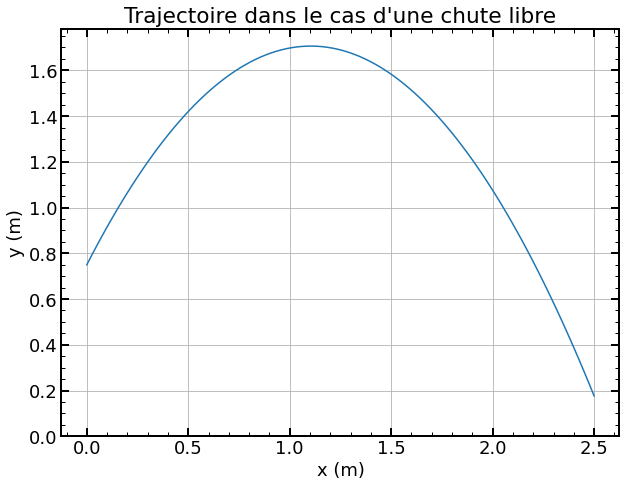

In [14]:
# calcul de la trajectoire
x_m = np.linspace(0, 2.5, 100)
y_m = trajectoire(x_m, alpha=60, vo=5, yo=0.75)

# représentation graphique
plt.plot(x_m, y_m)
plt.ylim(ymin=0)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoire dans le cas d'une chute libre");

### Exercice 2

<div class="alert alert-success">

<ol>
<li>Représenter la trajectoire à partir des points expérimentaux et comparer avec le modèle de la chute libre</li>
<li>Calculer les valeurs de la vitesse à chaque instant en utilisant la dérivée à droite et représenter les vecteurs vitesses.</li>
<li>Calculer les valeurs de la vitesse à chaque instant en utlisant une dérivée centrée et représenter les vecteurs vitesses.</li>
<li>Calculer l'accélération, en chaque point. Confirmer qu'il ne s'agit pas d'une chute libre.</li>
</ol>
</div>

#### 1. Représentation de la trajectoire

In [15]:
dt = 0.066
x = np.array([0.003, 0.141, 0.275, 0.410, 0.554, 0.686, 0.820, 0.958, 
              1.089, 1.227, 1.359, 1.490, 1.599, 1.705, 1.801])
y = np.array([0.746, 0.990, 1.175, 1.336, 1.432, 1.505, 1.528, 1.505, 
              1.454, 1.355, 1.207, 1.018, 0.797, 0.544, 0.266])
N = x.size

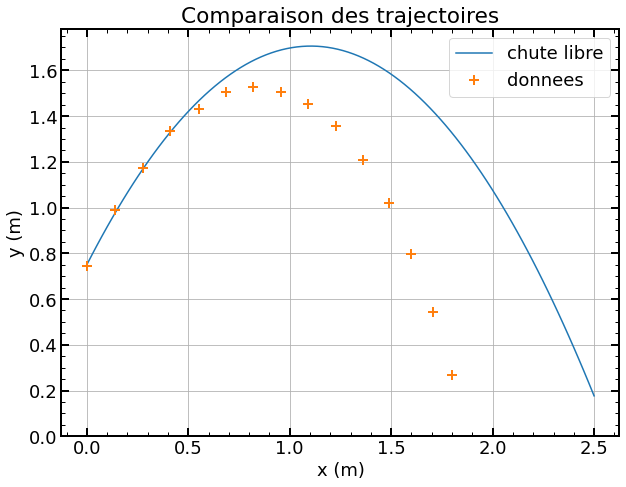

In [16]:
# calcul de la trajectoire
x_m = np.linspace(0, 2.5, 100)
y_m = trajectoire(x_m, alpha=60, vo=5, yo=0.75)

# représentation graphique
plt.plot(x_m, y_m, label="chute libre")

# données expérimentales
plt.plot(x, y, "+", markersize=10, markeredgewidth=2, label="donnees")
plt.ylim(ymin=0)
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Comparaison des trajectoires");

#### 2. Calcul des vitesses, dérivée à droite

Comme lors de la partie précédente, on calcule la vitesse en utilisant une boucle
et une dérivée à droite. C'est à dire que l'on utilise le point suivant.
Comme le mouvement est en deux dimensions on calcule séparément les composantes
du vecteur vitesse.

In [17]:
v_xd = list()
v_yd = list()
for i in range(N - 1):
    v_x_i = (x[i+1] - x[i]) / dt
    v_y_i = (y[i+1] - y[i]) / dt

    v_xd.append(v_x_i)
    v_yd.append(v_y_i)

# conversion en array numpy
v_xd = np.array(v_xd)
v_yd = np.array(v_yd)

# calcul de la norme du vecteur vitesse
vitesses_d = np.sqrt(v_xd ** 2 + v_yd ** 2)

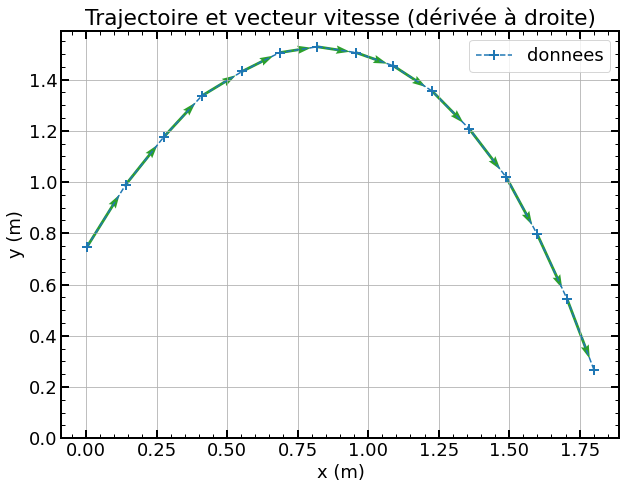

In [18]:
# représentation des vecteurs vitesses
plt.quiver(x[:-1], y[:-1], v_xd, v_yd, angles='xy', scale_units='xy',
           scale=18, color="C2", width=0.005)

# représentation de la trajectoire
plt.plot(x, y, "+--", markersize=10, markeredgewidth=2, label="donnees")
plt.ylim(ymin=0)
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoire et vecteur vitesse (dérivée à droite)");

#### 3. Calcul des vitesses, dérivée centrée

Le calcul de la dérivée centrée est plus précis que celui de la dérivée
à droite (ou à gauche). La formule à utiliser est cette fois :
$$
v_{x,i} = \frac{x_{i+1} - x_{i-1}}{2 dt}
$$

In [19]:
v_x = list()
v_y = list()
for i in range(1, N - 1):
    v_x_i = (x[i+1] - x[i-1]) / (2 * dt)
    v_y_i = (y[i+1] - y[i-1]) / (2 * dt)

    v_x.append(v_x_i)
    v_y.append(v_y_i)

# conversion en array numpy
v_x = np.array(v_x)
v_y = np.array(v_y)

# calcul de la norme du vecteur vitesse
vitesses = np.sqrt(v_x**2 + v_y**2)

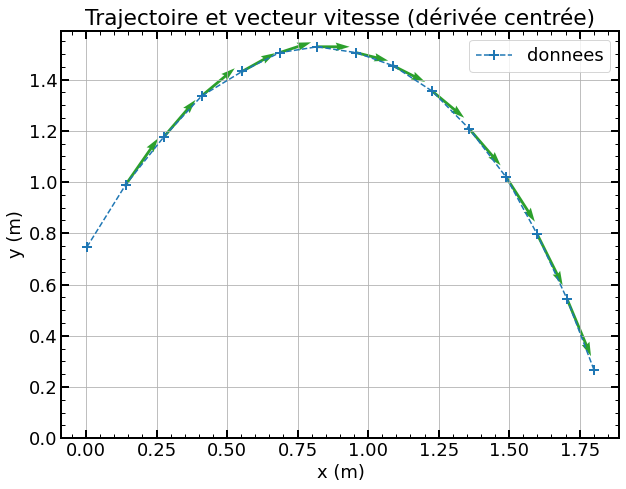

In [20]:
# représentation des vecteurs vitesses
plt.quiver(x[1:-1], y[1:-1], v_x, v_y, angles='xy', scale_units='xy',
           scale=18, color="C2", width=0.005)

# représentation de la trajectoire
plt.plot(x, y, "+--", markersize=10, markeredgewidth=2, label="donnees")
plt.ylim(ymin=0)
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoire et vecteur vitesse (dérivée centrée)");

On obtient bien des vecteurs vitesse tangeants à la trajectoire.

##### Remarque

Le calcul des dérivées peut se faire via des fonctions de `numpy`. En 
particulier la fonction `np.diff` permet de calculer une différence entre
des points consécutifs. La fonction `np.gradient` permet de calculer
une dérivée centrée.

Voici comment calculer la dérivée à droite avec `np.diff` : 

In [21]:
print("Calcul précédent :\n", v_xd)
print("Avec numpy :\n", np.diff(x) / dt)

Calcul précédent :
 [2.09090909 2.03030303 2.04545455 2.18181818 2.         2.03030303
 2.09090909 1.98484848 2.09090909 2.         1.98484848 1.65151515
 1.60606061 1.45454545]
Avec numpy :
 [2.09090909 2.03030303 2.04545455 2.18181818 2.         2.03030303
 2.09090909 1.98484848 2.09090909 2.         1.98484848 1.65151515
 1.60606061 1.45454545]


La dérivée centrée, peut être calculée avec la fonction `np.gradient`. Cette fonction
traite différement les points aux extrémités pour lesquels une dérivée à droite (pour le premier)
ou à gauche (pour le dernier) est calculée de sorte qu'une valeur de dérivée en
chaque point et retournée.

Pour comparer avec les valeurs calculées précédement, dans un premier temps, on ne les affiche pas.

In [22]:
print("Calcul précédent :\n", v_x)
derivee = np.gradient(x, dt)
print("Avec numpy :\n", derivee[1:-1])
print("Avec numpy (complet) :\n", derivee)

Calcul précédent :
 [2.06060606 2.03787879 2.11363636 2.09090909 2.01515152 2.06060606
 2.03787879 2.03787879 2.04545455 1.99242424 1.81818182 1.62878788
 1.53030303]
Avec numpy :
 [2.06060606 2.03787879 2.11363636 2.09090909 2.01515152 2.06060606
 2.03787879 2.03787879 2.04545455 1.99242424 1.81818182 1.62878788
 1.53030303]
Avec numpy (complet) :
 [2.09090909 2.06060606 2.03787879 2.11363636 2.09090909 2.01515152
 2.06060606 2.03787879 2.03787879 2.04545455 1.99242424 1.81818182
 1.62878788 1.53030303 1.45454545]


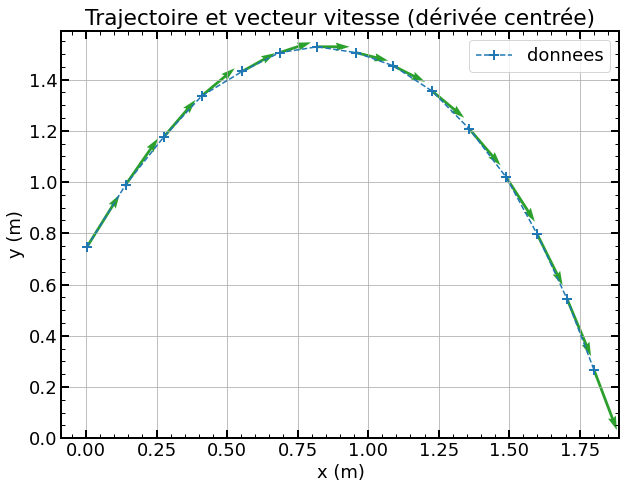

In [23]:
# représentation des vecteurs vitesses
plt.quiver(x, y, np.gradient(x, dt), np.gradient(y, dt), angles='xy', scale_units='xy',
           scale=18, color="C2", width=0.005)

# représentation de la trajectoire
plt.plot(x, y, "+--", markersize=10, markeredgewidth=2, label="donnees")
plt.ylim(ymin=0)
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoire et vecteur vitesse (dérivée centrée)");

### 4. Calcul de l'accélération

Pour calculer l'accélération on procède de la même manière que pour le calcul
de la vitesse en utilisant une dérivée centrée.

In [24]:
a_x = list()
a_y = list()

N_v = v_x.size

for i in range(1, N_v - 1):
    a_x_i = (v_x[i+1] - v_x[i-1]) / (2 * dt)
    a_y_i = (v_y[i+1] - v_y[i-1]) / (2 * dt)

    a_x.append(a_x_i)
    a_y.append(a_y_i)

# conversion en array numpy
a_x = np.array(a_x)
a_y = np.array(a_y)

# calcul de la norme du vecteur acceleration
accelerations = np.sqrt(a_x ** 2 + a_y ** 2)

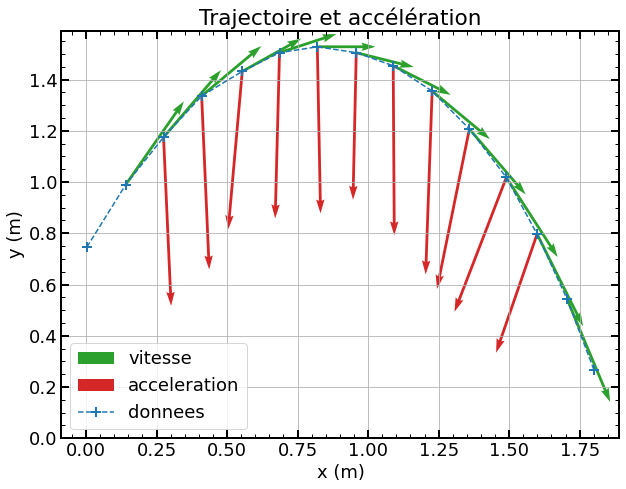

In [25]:
# représentation des vecteurs vitesse
plt.quiver(x[1:-1], y[1:-1], v_x, v_y, angles='xy', scale_units='xy',
           scale=10, color="C2", width=0.005, label="vitesse")

# représentation des vecteurs accélération
plt.quiver(x[2:-2], y[2:-2], a_x, a_y, angles='xy', scale_units='xy',
           scale=15, color="C3", width=0.005, label="acceleration")

# représentation de la trajectoire
plt.plot(x, y, "+--", markersize=10, markeredgewidth=2, label="donnees")
plt.ylim(ymin=0)
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoire et accélération");

On observe que le vecteur acceleration n'est pas constant ce qui confirme que ce n'est pas une chute libre.

On peut afficher les valeurs de la norme des vecteurs vitesses et accélérations pour les points pour lesquels on les a calculés.

In [26]:
for i in range(N):
    if 1 < i < N - 2:
        print(f"v = {vitesses[i-1]:.3f} m.s-1   a = {accelerations[i-2]:6.3f} m.s-2")
    elif 0 < i < N-1:
        print(f"v = {vitesses[i-1]:.3f} m.s-1")


v = 3.848 m.s-1
v = 3.320 m.s-1   a =  9.880 m.s-2
v = 2.874 m.s-1   a = 10.166 m.s-2
v = 2.452 m.s-1   a =  9.270 m.s-2
v = 2.142 m.s-1   a =  9.702 m.s-2
v = 2.061 m.s-1   a =  9.758 m.s-2
v = 2.114 m.s-1   a =  8.611 m.s-2
v = 2.333 m.s-1   a =  9.929 m.s-2
v = 2.772 m.s-1   a = 10.738 m.s-2
v = 3.238 m.s-1   a =  9.512 m.s-2
v = 3.599 m.s-1   a =  8.331 m.s-2
v = 3.943 m.s-1   a =  7.279 m.s-2
v = 4.304 m.s-1


Pour avoir un premier aperçu de l'accélération due à la force de frottement (ou de trainée),
on peut regarder les composantes du vecteur accélération après soustraction du vecteur
champs de pesanteur.

In [27]:
for i in range(len(a_x)):
    a_y_f = a_y[i] + g
    a_f = np.sqrt(a_x[i] ** 2 + a_y_f ** 2)
    print(f"a_x ={a_x[i]:7.3f} m.s-2    a_y ={a_y_f:7.3f} m.s-2    a = {a_f:.3f} m.s-2")

a_x =  0.402 m.s-2    a_y = -0.065 m.s-2    a = 0.407 m.s-2
a_x =  0.402 m.s-2    a_y = -0.352 m.s-2    a = 0.534 m.s-2
a_x = -0.746 m.s-2    a_y =  0.567 m.s-2    a = 0.937 m.s-2
a_x = -0.230 m.s-2    a_y =  0.107 m.s-2    a = 0.253 m.s-2
a_x =  0.172 m.s-2    a_y =  0.050 m.s-2    a = 0.179 m.s-2
a_x = -0.172 m.s-2    a_y =  1.198 m.s-2    a = 1.210 m.s-2
a_x =  0.057 m.s-2    a_y = -0.122 m.s-2    a = 0.135 m.s-2
a_x = -0.344 m.s-2    a_y = -0.926 m.s-2    a = 0.988 m.s-2
a_x = -1.722 m.s-2    a_y =  0.452 m.s-2    a = 1.780 m.s-2
a_x = -2.755 m.s-2    a_y =  1.944 m.s-2    a = 3.372 m.s-2
a_x = -2.181 m.s-2    a_y =  2.862 m.s-2    a = 3.598 m.s-2


On remarque que l'accélération suivant x n'est pas négative sur l'ensemble de la trajectoire. De même, l'accélération suivant y
présente des changements de signes probablement dues aux incertitudes de mesures. 

Pour chercher un modèle de force de trainée, on peut regarder si le rapport entre l'accélaration et la vitesse à une puissance $n$ est
constant.

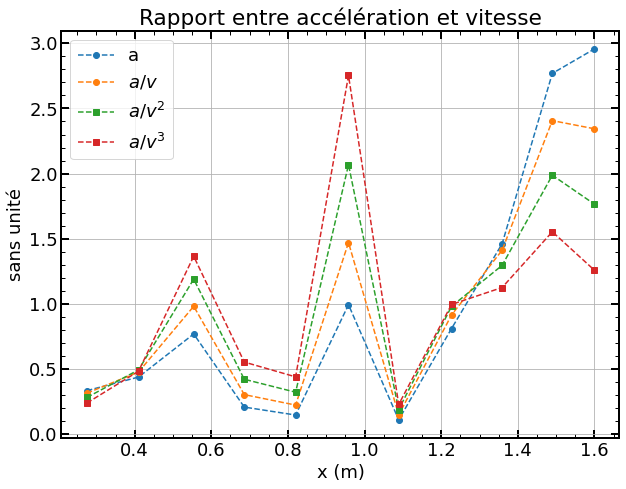

In [28]:
a_f = list()
for i in range(len(a_x)):
    a_y_f = a_y[i] + g
    a_f.append(np.sqrt(a_x[i] ** 2 + a_y_f ** 2))

a_f = np.array(a_f)

k1 = a_f / vitesses[1:-1]
k2 = a_f / (vitesses[1:-1]) ** 2
k3 = a_f / (vitesses[1:-1]) ** 3

plt.plot(x[2:-2], a_f / a_f.mean(), "o--", label="a")
plt.plot(x[2:-2], k1 / k1.mean(), "o--", label="$a/v$")
plt.plot(x[2:-2], k2 / k2.mean(), "s--", label="$a/v^2$")
plt.plot(x[2:-2], k3 / k3.mean(), "s--", label="$a/v^3$")
plt.legend()
plt.title("Rapport entre accélération et vitesse")
plt.ylabel("sans unité")
plt.xlabel("x (m)");

## Partie 3 : Bilan énergétique

Dans cette partie on va effectuer un bilan d'énergie des deux mouvements.
On considère un ballon de masse 567 g.

<div class="alert alert-success">

<b>Exercice :</b>

<ol>
<li>Ecrire des fonctions qui :
    <ul>
    <li>Calcule l'énergie cinétique</li>
    <li>Calcule l'énergie potentielle de pesanteur</li>
    </ul>
</li>
<li>Représenter l'évolution des énergies en fonction du temps pour le mouvement unidimensionnel</li>
<li>Représenter l'évolution des énergies en fonction du temps pour le mouvement bidimensionnel</li>
<li>Calculer l'énergie cinétique en décomposant la vitesse suivant x et y et comparer les deux contributions</li>
</ol>
</div>

### 1. Les fonctions

In [29]:
def calc_E_cinet(v, m=1):
    """ Calcul de l'énergie cinétique E_c = 1/2 m v^2

    Args:
        v (float): vitesse, en m.s-1
        m (float): masse, en kg
    
    Returns
        Energie cinétique, en Joule
    """
    return m * v**2 / 2

def calc_E_pot(h, m=1, g=9.80665):
    """ Calcul de l'énergie potentielle de pesanteur E_p = m g h.
    L'origine est fixée au niveau de la mer.

    Args:
        h (float): altitude par rapport au niveau de la mer, en m
        m (float): masse, en kg
        g (float): pesanteur, en m.s-2

    Returns
        Energie potentielle, en Joule
    """
    return m * g * h



### 2. Mouvement unidimensionnel

On reprend les données de la trajectoire et on calcule la vitesse.

In [30]:
x = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
z = [5.00, 4.95, 4.80, 4.56, 4.22, 3.77, 3.23, 2.60, 1.86, 1.03, 0.09]
t = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]

# on peut calculer les valeurs de vitesse avec une compréhension de liste
v_z = [(z[i + 1] - z[i]) / (t[i + 1] - t[i]) for i in range(len(z) - 1)]
vitesses = np.abs(v_z)

# par commodité on convertit les altitudes en numpy array
z = np.array(z)

On représente maintenant l'évolution de l'énergie cinétique, de l'énergie potentielle
et de l'énergie mécanique.

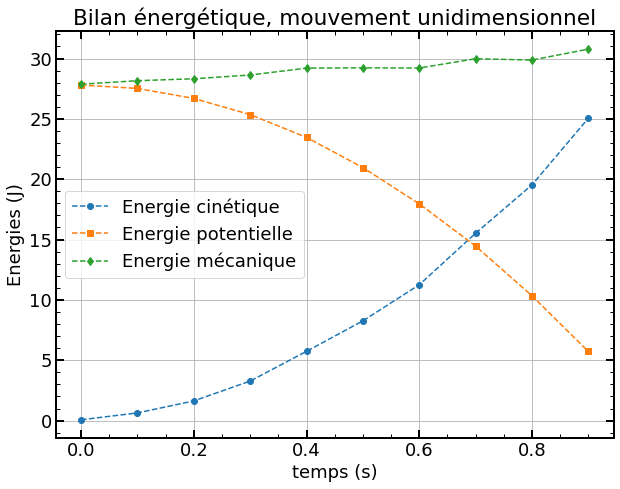

In [31]:
# calcul des énergies
Ecinet = calc_E_cinet(vitesses, m=0.567)
Epot = calc_E_pot(z[:-1], m=0.567)
Em = Ecinet + Epot

# représentation graphique
plt.plot(t[:-1], Ecinet, "o--", label="Energie cinétique")
plt.plot(t[:-1], Epot, "s--", label="Energie potentielle")
plt.plot(t[:-1], Em, "d--", label="Energie mécanique")
plt.xlabel("temps (s)")
plt.ylabel("Energies (J)")
plt.title("Bilan énergétique, mouvement unidimensionnel")
plt.legend();

On observe la conversion d'énergie entre l'énergie potentielle et l'énergie cinétique.
Dans le cadre d'une chute libre, l'énergie mécanique devrait être constante.

### 3. Mouvement bidimensionnel

On reprend les données dans le cas d'un mouvement bidimensionnel.

In [32]:
dt = 0.066
x = np.array([0.003, 0.141, 0.275, 0.410, 0.554, 0.686, 0.820, 0.958, 
              1.089, 1.227, 1.359, 1.490, 1.599, 1.705, 1.801])
y = np.array([0.746, 0.990, 1.175, 1.336, 1.432, 1.505, 1.528, 1.505, 
              1.454, 1.355, 1.207, 1.018, 0.797, 0.544, 0.266])

# calcul des vitesses avec numpy par commodité
# on peut aussi reprendre le code précédent avec la boucle
vitesses = np.sqrt(np.gradient(x, dt)**2 + np.gradient(y, dt)**2)

# temps
t = np.arange(0, x.size * dt, dt)


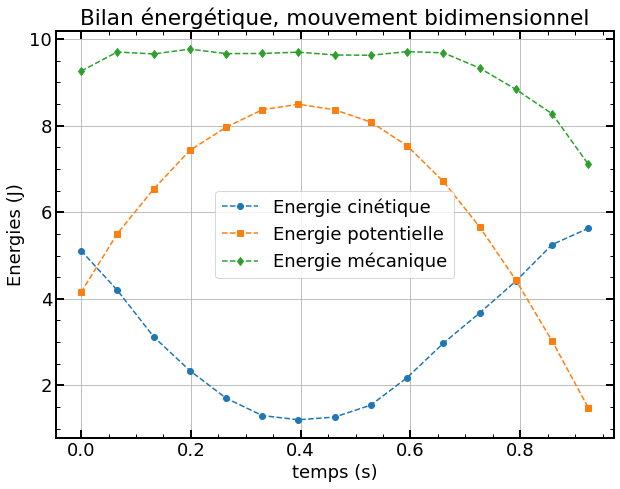

In [33]:
# calcul des énergies
Ecinet = calc_E_cinet(vitesses, m=0.567)
Epot = calc_E_pot(y, m=0.567)
Em = Ecinet + Epot

# représentation graphique
plt.plot(t, Ecinet, "o--", label="Energie cinétique")
plt.plot(t, Epot, "s--", label="Energie potentielle")
plt.plot(t, Em, "d--", label="Energie mécanique")
plt.xlabel("temps (s)")
plt.ylabel("Energies (J)")
plt.title("Bilan énergétique, mouvement bidimensionnel")
plt.legend();

On observe ici également les échanges entre l'énergie cinétique et l'énergie potentielle.
L'énergie totale est à peu près constante sur la première partie du mouvement, 
jusqu'à $t=0.6s$. 
En fin de mouvement, lorsque le balon reprend de la vitesse, on observe une diminution de l'énergie totale qui 
peut être attribuée aux frottements.

### 4. Décomposition de la vitesse suivant x et y

On calcule l'énergie cinétique totale et l'énergie cinétique en utilisant les 
composantes de la vitesse suivant x et y.

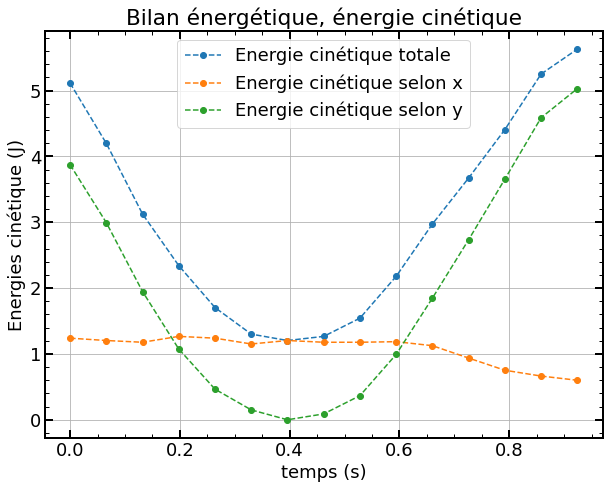

In [34]:
# calcul des énergies
Ecinet = calc_E_cinet(vitesses, m=0.567)
Ecinet_x = calc_E_cinet(np.gradient(x, dt), m=0.567)
Ecinet_y = calc_E_cinet(np.gradient(y, dt), m=0.567)

# représentation graphique
plt.plot(t, Ecinet, "o--", label="Energie cinétique totale")
plt.plot(t, Ecinet_x, "o--", label="Energie cinétique selon x")
plt.plot(t, Ecinet_y, "o--", label="Energie cinétique selon y")
plt.xlabel("temps (s)")
plt.ylabel("Energies cinétique (J)")
plt.title("Bilan énergétique, énergie cinétique")
plt.legend();

On observe que 

* l'énergie cinétique associée à la composante de la vitesse suivant $x$ est à peu près constante et décroit à la fin de la trajectoire.
* l'énergie cinétique associée à la composante de la vitesse suivant $y$ passe par un minimum pour lequel elle s'annule. Cela correspond à l'altitude maximale de la trajectoire.

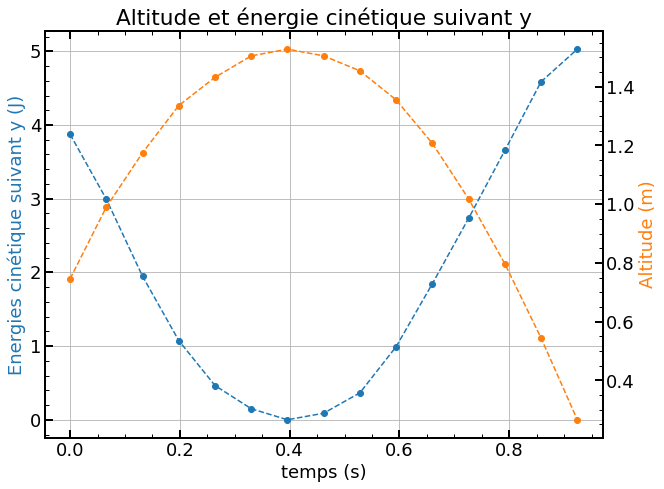

In [35]:
# représentation graphique
plt.plot(t, Ecinet_y, "o--", label="Energie cinétique selon y")
plt.xlabel("temps (s)")
plt.ylabel("Energies cinétique suivant y (J)", color="C0")

plt.twinx()
plt.plot(t, y, "C1o--")
plt.grid(False)
plt.ylabel("Altitude (m)", color="C1")

plt.title("Altitude et énergie cinétique suivant y");